In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
k = 1

In [2]:
df_base = pd.read_csv('True.csv') # Загрузим данные из первого файла, где лежат правдивые статьи

df_base['Real'] = True  # Создадим новый столбец и заполним
df_base.head()

,title,text,subject,date,Real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [3]:
df_base = pd.concat([df_base, pd.read_csv('Fake.csv')]) # Присоединяем данные о ложных статьях
df_base['Real'] = df_base['Real'].fillna(False) # И зполняем столбец истинности

In [4]:
df_base.describe() # Посмотрим описание df

,title,text,subject,date,Real
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",False
freq,14,627,11272,182,23481


In [5]:
for i in df_base.columns: # Посмотрим, какие есть уникальные значения
    print(i)
    print(df_base[i].unique())
    print()

title
['As U.S. budget fight looms, Republicans flip their fiscal script'
 'U.S. military to accept transgender recruits on Monday: Pentagon'
 "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'" ...
 'BOILER ROOM – No Surrender, No Retreat, Heads Will Roll  – EP #38'
 'Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family – Bundys Lead Protest'
 'A Troubled King: Chicago’s Rahm Emanuel Desperate to Save His 2020 Presidential Run']

text
['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wed

In [6]:
import pymorphy3
import re

ma = pymorphy3.MorphAnalyzer()

def clean_text(text): # функция для очистки текста и приведения всех слов к базовым формам
    text = text.replace("\\", " ").replace(u"╚", " ").replace(u"╩", " ")
    text = text.lower()
    text = re.sub('\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', text) #deleting newlines and line-breaks
    text = re.sub('[.,:;_%©?*,!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text) #deleting symbols  
    text = " ".join(ma.parse(word)[0].normal_form for word in text.split())
    text = ' '.join(word for word in text.split() if len(word)>3)
    text = text.encode("utf-8")

    return text

In [7]:
df = df_base.copy() 
df['text'] = df.apply(lambda x: clean_text(x[u'text']).decode("utf-8", "strict"), axis=1) # очищаем строки в столбцах заголовков и текста
df['title'] = df.apply(lambda x: clean_text(x[u'title']).decode("utf-8", "strict"), axis=1)

C:\Users\kanze\AppData\Local\Temp\ipykernel_21588\126419826.py:10: FutureWarning: Possible nested set at position 30
  text = re.sub('[.,:;_%©?*,!@#$%^&()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text) #deleting symbols


In [8]:
df.head() # посмотрим на изменения 

,title,text,subject,date,Real
0,budget fight looms republicans flip their fisc...,washington reuters head conservative republica...,politicsNews,"December 31, 2017",True
1,military accept transgender recruits monday pe...,washington reuters transgender people will all...,politicsNews,"December 29, 2017",True
2,senior republican senator 'let mueller job',washington reuters special counsel investigati...,politicsNews,"December 31, 2017",True
3,russia probe helped australian diplomat,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",True
4,trump wants postal service charge 'much more' ...,seattle washington reuters president donald tr...,politicsNews,"December 29, 2017",True


In [9]:
df.to_pickle(f'../dataframe_ver_{k}.pkl') # Сохраним в файл
k += 1

In [10]:
df = pd.read_pickle(f'../dataframe_ver_{1}.pkl') # Считаем из файла

In [11]:
df = df.sample(frac=1) # Перемешаем в первый раз

In [12]:
df.head()

,title,text,subject,date,Real
19340,syrians vote kurdish regions north,qamishli syria reuters syrians voted friday el...,worldnews,"September 22, 2017",True
4948,trump's pick lead cftc unveils major policy ag...,washington boca raton reuters derivatives regu...,politicsNews,"March 15, 2017",True
18467,trump’s lawyer destroys chriswallace heated ex...,just this chris wallace flaming liberal total ...,left-news,"Jun 18, 2017",False
6586,putin shrugs trump's nuclear plans says democr...,moscow reuters russia’s vladimir putin said fr...,politicsNews,"December 23, 2016",True
6222,string deaths linked human experimentation bon...,prosecutors allege that bone cement manufactur...,News,"May 22, 2016",False


In [13]:
# создадим массив, содержащий уникальные категории из нашего DataFrame
subjects = {}
for key,value in enumerate(df[u'subject'].unique()):
    subjects[value] = key + 1
reality = {}
for key,value in enumerate(df[u'Real'].unique()):
    reality[value] = key 
# Запишем в новую колонку числовое обозначение категории 
df['subject'] = df[u'subject'].map(subjects)
df['Real'] = df[u'Real'].map(reality)

total_categories = len(df[u'subject'].unique())
print('Всего тем: {}'.format(total_categories))
print('Всего реальностей: {}'.format(len(df[u'Real'].unique())))

Всего тем: 8
Всего реальностей: 2


In [14]:
df.groupby('Real').count() # Посчитаем количество ложных и истинных статей

,title,text,subject,date
Real,,,,
0,21417,21417,21417,21417
1,23481,23481,23481,23481


In [15]:
df = df.sample(frac=1).reset_index(drop=True) # Перемешаем еще раз, на этот раз обновим индексы
df

,title,text,subject,date,Real
0,kremlin covering election intrigue demonising ...,moscow reuters kremlin said monday that allega...,2,"August 1, 2016",0
1,sara carter right about spying trump “this goe...,https youtube watch pcco,6,"Mar 23, 2017",1
2,breaking ramadan update obama’s “not islamic” ...,alluha akbar islamic pretty sure these cowards...,3,"Jul 1, 2016",1
3,trump 'sad day' north korea takes military action,washington beijing reuters president donald tr...,1,"September 7, 2017",0
4,senior national security official leave justic...,washington reuters senior justice department o...,2,"September 27, 2016",0
...,...,...,...,...,...
44893,algeria says jerusalem announcement 'blatant v...,tunis reuters algeria deeply concerned about d...,1,"December 6, 2017",0
44894,taiwan hopes find 'natural way' engage with ch...,taipei reuters taiwan hopes find natural excha...,1,"November 6, 2017",0
44895,democrat senator makes fake anti trump story d...,democrats lying over place along with main str...,5,"May 11, 2017",1
44896,polls show millennials hate trump would overwh...,notion that millennials stupid spoiled uninfor...,4,"April 25, 2016",1


In [16]:
title = df['title']
text = df[u'text']
subj = df['subject']
real = df['Real']
# Посчитаем максимальную длинну текста описания в словах
max_title = 0
for tit in title:
    words = len(tit.split())
    if words > max_title:
        max_title = words
print('Максимальная длина заголовка: {} слов'.format(max_title))

max_text = 0
for tit in text:
    words = len(tit.split())
    if words > max_text:
        max_text = words
print('Максимальная длина текста: {} слов'.format(max_text))
maxSequenceLength = 5377

Максимальная длина заголовка: 30 слов
Максимальная длина текста: 5377 слов


In [17]:
print(real.where(real == 0).count()) 
print(real.where(real == 1).count())

21417
23481


In [18]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [19]:
title1 = list([ list(x.split()) for x in title]) # Создаем списки слов
text1 = list([ list(x.split()) for x in text])

In [20]:
model = Word2Vec(sentences=title1+text1, vector_size=100, window=5, min_count=1, workers=4) # создаем словарь формата Слово-Вектор
model.save("../word2vec.model") # Сохраняем модель

In [21]:
model = Word2Vec.load("../word2vec.model") # Загружаем

In [22]:
word_vectors = model.wv # Это чистый словарь, без структуры всей модели
# word_vectors.save("../word2vec.wordvectors")

In [23]:
word_vectors['information'] # Посмотрим, что лежит внутри

array([-2.8624454e+00,  1.3831979e+00, -8.7500173e-01,  1.0862585e+00,
       -2.1859548e+00,  2.4243100e-01,  2.5509493e+00,  5.8232599e-01,
        4.2732468e-01,  1.1064658e+00, -1.9454410e+00,  6.0859317e-01,
       -2.0424722e-01,  2.6950803e+00, -2.3584003e+00, -1.7645272e+00,
       -4.5470580e-01,  1.8781463e+00,  3.7658429e+00,  1.4332950e+00,
        2.9090750e+00, -1.1009141e+00, -3.2968802e+00,  1.4071728e+00,
        2.3226792e-01,  8.8822675e-01,  3.0160556e+00, -2.8420694e+00,
        5.9419674e-01,  4.1132579e+00,  1.8130523e+00,  8.6379784e-01,
        1.4610211e+00, -1.5910779e+00,  1.1691263e+00,  1.0128398e+00,
        2.5586667e+00, -8.0878323e-01, -5.1181054e-01, -3.0591888e+00,
       -1.8193059e+00,  6.8518052e+00,  1.1324293e-01,  1.4398340e+00,
       -1.5831540e+00,  1.7955329e+00, -1.6355617e-01,  5.0088257e-01,
        1.5404905e+00, -1.3340943e+00, -2.8030844e+00,  1.1393609e+00,
        1.7208655e+00, -3.9305404e-01, -7.7340335e-02,  2.8154123e-01,
      

Подготовим данные к нейросети

In [24]:
mmas1 = [] # списки верхнего уровня для передачи для обучения или прогноза
mmas2 = []
mmasy = []

for i in range(len(text1)): # Проходимся по всем строкам
    mas1 = []   # списки нижнего уровня, в которых будут лежать векторы слов
    mas2 = []
    masy = []
    for x in text1[i]:  # переводим слова в векторы и заполняем списки
        mas1.append(np.array(word_vectors[x]))
    for x in title1[i]:
        mas2.append(np.array(word_vectors[x]))

    while len(mas2) < max_title:    # заполняем пустые значения, чтобы соблюдать размерность
        mas2.append(np.array([0]*100))
    
    if len(mas1) > 30: # если статья больше - делим на части по 30 и каждую из них помещаем в верхнеуровневый список
        for j in range(0, len(mas1) // 30, 30):
            m = mas1[j:j+30]
            while len(m) < 30:
                m.append(np.array([0]*100))
            mmas1.append(np.array(mas1[j:j+30]))
            mmas2.append(np.array(mas2))
            mmasy.append(real[i])
X1_train = np.array(mmas1) # преобразуем в читаемый для модели вид
sep = int(len(X1_train) *0.75)  # выделяем тествую выборку
X1_test = X1_train[sep:]        # тестовая
X1_train = X1_train[:sep]       # тренировочная

X2_train = np.array(mmas2)
X2_test = X2_train[sep:]
X2_train = X2_train[:sep]

Y_train = np.array(mmasy)
Y_test = Y_train[sep:]
Y_train = Y_train[:sep]

print('X1_train', X1_train.shape)
print('X1_test', X1_test.shape)
print()
print('X2_train', X2_train.shape)
print('X2_test', X2_test.shape)
print()
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)


X1_train (32529, 30, 100)
X1_test (10844, 30, 100)

X2_train (32529, 30, 100)
X2_test (10844, 30, 100)

Y_train (32529,)
Y_test (10844,)


In [25]:
print('Train 1',len(Y_train[Y_train == 1])) # количество истинных и ложных статей в тестовых и тренировочных спсиках
print('Train 0',len(Y_train[Y_train == 0]))
print('Test 1',len(Y_test[Y_test == 1]))
print('Test 0',len(Y_test[Y_test == 0]))

Train 1 16592
Train 0 15937
Test 1 5598
Test 0 5246


In [26]:
from tensorflow import keras
import keras.layers as layers

In [27]:
text_input = keras.Input(shape=(30, 100), name='Input Text') # Создаем модель с двумя входами заданной формы 
title_input = keras.Input(shape=(30, 100), name='Input Title')

x1 = layers.Conv1D(10, 10)(title_input)  # Задаем сверточный слой
x1 = layers.GlobalMaxPooling1D()(x1) # Слой субдискретизации

x2 = layers.Conv1D(10, 10)(text_input) # Задаем сверточный слой
x2 = layers.GlobalMaxPooling1D()(x2) # Слой субдискретизации

x = layers.concatenate([x1,x2])
x = layers.Dense(3, name='Addit_dense')(x)

score_output = layers.Dense(1, name='Output')(x)
model = keras.Model(inputs=[text_input, title_input],
                    outputs=[score_output])

In [28]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)  # Нарисуем схему полученной модели

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
model.compile( # Скомпилируем модель
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), "binary_crossentropy"],
    metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])

In [30]:
history = model.fit([X1_train, X2_train], Y_train , # Передадим значения и натренеруем модель
          batch_size=50,
          epochs=10)

Epoch 1/10


651/651 [==============================] - 88s 4ms/step - loss: 0.5787 - binary_crossentropy: 1.3655 - accuracy: 0.8309
Epoch 2/10
651/651 [==============================] - 2s 4ms/step - loss: 0.0129 - binary_crossentropy: 0.0581 - accuracy: 0.9969
Epoch 3/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0076 - binary_crossentropy: 0.0421 - accuracy: 0.9969
Epoch 4/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0058 - binary_crossentropy: 0.0344 - accuracy: 0.9969
Epoch 5/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0050 - binary_crossentropy: 0.0307 - accuracy: 0.9970
Epoch 6/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0045 - binary_crossentropy: 0.0282 - accuracy: 0.9970
Epoch 7/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0042 - binary_crossentropy: 0.0270 - accuracy: 0.9971
Epoch 8/10
651/651 [==============================] - 2s 3ms/step - loss: 0.0041 - bina

<Axes: >

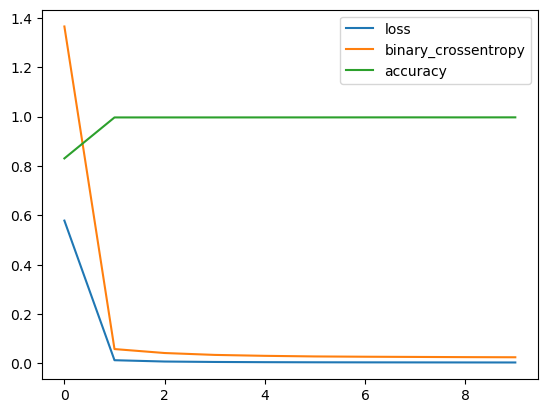

In [31]:
hist = pd.DataFrame(history.history) # История развития модели
hist.plot()

In [32]:
from sklearn.metrics import *

339/339 [==============================] - 1s 3ms/step


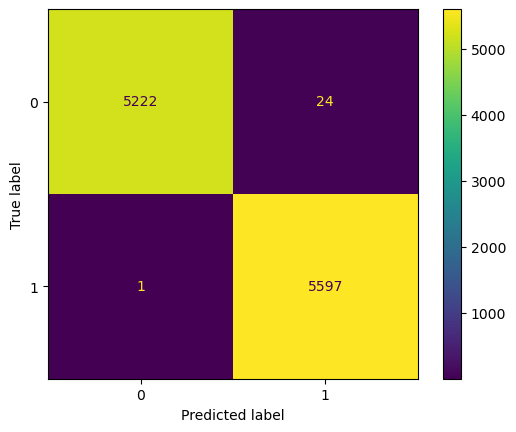

In [33]:
y_pred_NN = np.round(model.predict([X1_test,X2_test])[:, 0]) # Проверим на тестовых данных
ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=y_pred_NN);

Возьму какую-нибудь объективно ложную статью на английском  
Например, статью уважаемого американского издания World News Daily Report, оригинал которой найти не удалось, что даже к лучшему  
Далее будет взята копия с сайта Snopes: https://www.snopes.com/fact-check/texas-alien-anal-probe/

In [34]:
title_snopes = 'Did a Texas Man Confess to Kidnapping 79 People While Disguised as an Alien?'
text_snopes = "A man who was arrested by the FBI Yesterday has confessed to kidnapping and sexually assaulting several dozen people while using costumes, drugs, and special effects to have his victims believe they had been abducted by aliens. 73-year old Arnold White was arrested after a joint investigation led by the Federal Bureau of Investigation, the El Paso Sheriff's Office and the El Paso Police Department. Originally interrogated about 4 crimes committed in the region in the 1990s, the retired trucker confessed a total of 79 kidnappings across California, Nevada, New Mexico, and Texas over a period of 40 years. Mr. White confessed to using a mix of hallucinatory drugs containing LSD and PCP to subdue his victims, before approaching them and carrying them inside his truck to assault them. In order to confuse his victims even more, he had set up the inside of his truck to look like an operating room and would wear an alien costume."

Теперь обработаем входные данные

In [35]:
title_snopes = clean_text(title_snopes).decode("utf-8", "strict")
text_snopes = clean_text(text_snopes).decode("utf-8", "strict")

In [36]:
title1 = list(title_snopes.split())
text1 = list(text_snopes.split())
print(len(title1))
print(len(text1))

7
89


In [37]:
title1

['texas', 'confess', 'kidnapping', 'people', 'while', 'disguised', 'alien']

In [38]:
title_snopes1 = []
text_snopes1 = []
for i in title1:
    if word_vectors.has_index_for(i):
        title_snopes1.append(i)
for i in text1:
    if word_vectors.has_index_for(i):
        text_snopes1.append(i)

In [39]:
print(len(title_snopes1))
print(len(text_snopes1))

7
89


In [40]:
mas1 = []
mas2 = []
mmas1 = []
mmas2 = []
for x in text_snopes1:
    mas1.append(np.array(word_vectors[x]))
for x in title_snopes1:
    mas2.append(np.array(word_vectors[x]))

while len(mas2) < max_title:
    mas2.append(np.array([0]*100))

if len(mas1) > 30:
    for j in range(0, len(mas1) // 30, 30):
        m = mas1[j:j+30]
        while len(m) < 30:
            m.append(np.array([0]*100))
        mmas1.append(np.array(mas1[j:j+30]))
        mmas2.append(np.array(mas2))
X1 = np.array(mmas1)
X2 = np.array(mmas2)

In [41]:
reality

{True: 0, False: 1}

In [42]:
res = model.predict([X1,X2])[0,0]
if res > 0.90:
    print('Статья - Фейк!')
elif res < 0.10:
    print('Статья - Правда!')
else:
    print(f'Сложно сказать, но с вероятностью {int(res*100)}% эта статья - фейк')

1/1 [==============================] - 0s 25ms/step
Статья - Фейк!


Сокращенная ячейка для последующих проверок

In [43]:
def check(title_snopes, text_snopes):
    title_snopes = clean_text(title_snopes).decode("utf-8", "strict")
    text_snopes = clean_text(text_snopes).decode("utf-8", "strict")
    title1 = list(title_snopes.split())
    text1 = list(text_snopes.split())
    title_snopes1 = []
    text_snopes1 = []
    for i in title1:
        if word_vectors.has_index_for(i):
            title_snopes1.append(i)
    for i in text1:
        if word_vectors.has_index_for(i):
            text_snopes1.append(i)
    mas1 = []
    mas2 = []
    mmas1 = []
    mmas2 = []
    for x in text_snopes1:
        mas1.append(np.array(word_vectors[x]))
    for x in title_snopes1:
        mas2.append(np.array(word_vectors[x]))

    while len(mas2) < max_title:
        mas2.append(np.array([0]*100))

    if len(mas1) > 30:
        for j in range(0, len(mas1) // 30, 30):
            m = mas1[j:j+30]
            while len(m) < 30:
                m.append(np.array([0]*100))
            mmas1.append(np.array(mas1[j:j+30]))
            mmas2.append(np.array(mas2))
    X1 = np.array(mmas1)
    X2 = np.array(mmas2)
    res = model.predict([X1,X2])[0,0]
    if res > 0.90:
        print('Статья - Фейк!')
    elif res < 0.10:
        print('Статья - Правда!')
    else:
        print(f'Сложно сказать, но с вероятностью {int(res*100)}% эта статья - фейк')

Возьму случайную статью из NY Times  
https://www.nytimes.com/2023/12/06/arts/music/mr-brightside-killers.html

In [44]:
title = "How ‘Mr. Brightside’ Became a Generation’s Anthem"
text = """The Killers released “Mr. Brightside” 20 years ago and hardly anybody cared.

The dominant hits of the day were hip-shakers and party bangers whose titles doubled as bodily imperatives: “Shake Ya Tailfeather,” “Get Low,” “Stand Up” — odes to the delirious, thrilling movements that keep the party going. “Mr. Brightside” is … not that.

It’s an intense, dramatic song about the shattering experience of getting cheated on by someone you love. The lead single off the Las Vegas band’s debut studio album, “Hot Fuss,” consists of exactly one verse, pre-chorus and chorus, which simply repeat; the singer Brandon Flowers’s voice is the sardonic wail of a jilted lover who is physically ill at the thought of his girlfriend being with someone else (“Now they’re going to bed, and my stomach is sick”), and pretends that he is totally OK (“Comin’ out of my cage, and I’ve been doing just fine”) when he is obviously an absolute wreck (“I just can’t look, it’s killing meeeee”).

Yet in the intervening decades, “Mr. Brightside” — which eventually reached the Billboard Hot 100 over a year after its initial release, peaking at No. 10 in June 2005 — has become something more than a hit. It has grown into an all-purpose, inescapable rallying cry: a karaoke staple, a football tradition, a party playlist must-have, a meme. It’s a straight shot of nostalgia that, having survived that awkward interval when a song feels dated and falls out of favor, now belongs to a pantheon of modern classics that are both extremely of their time and transcend it.

If boomers gave the masses “Don’t Stop Believin’,” millennials can claim “Mr. Brightside” as the generation’s official entry into that canon: a song that gets everybody at the bar shout-singing along.

The track is the centerpiece of the Killers’ oeuvre and the star of their new greatest hits album, “Rebel Diamonds,” which is full of hits with lyrics that are basically tattooed onto the hippocampuses of even the most casual fans — “All These Things That I’ve Done” (“I’ve got soul but I’m not a soldier”), the synthy-sad “Smile Like You Mean It” and gender-bendy “Somebody Told Me” (“you had a boyfriend who looked like a girlfriend that I had…”). But none of those singles comes close to matching the ongoing ubiquity of “Mr. Brightside.”

“We’ve never not played that song live, because it’s stood the test of time and I’m proud of it,” Flowers told Spin in 2015. “I never get bored of singing it.” (A representative for Flowers said he was unable to speak for this article because he was in the studio.)

“You drop this on a Friday night at midnight and the whole club just goes bananas,” said William Reed, a D.J. and founder of Club Decades, a dance party at Boardner’s in Hollywood. “Literally everybody in there is dancing and singing and dancing on top of the platforms and shouting with their eyes closed and screaming. It’s beautiful.”"""

In [45]:
check(title, text)

1/1 [==============================] - 0s 31ms/step
Сложно сказать, но с вероятностью 85% эта статья - фейк


Или другую:  
https://www.nytimes.com/2023/12/06/us/shooting-austin-isd-officer-texas.html

In [46]:
title = "Several Killed in Shootings Across Central Texas"
text = """A man suspected of killing multiple people in a string of shootings across Austin, Texas, on Tuesday was taken into custody and charged with capital murder and other charges, the police said.

Robin Henderson, the Austin Police Department’s interim chief, announced the details of the shootings at a news conference early Wednesday morning. She said the police had not determined that the incidents were connected until Tuesday night.

“The nature of the relationship, if any, between the victims and the suspect is unknown,” Chief Henderson said.

The suspect, who was not identified, may also be linked to a separate homicide investigation farther south, in Bexar County, she added.

The first shooting occurred on Tuesday morning, when the suspect shot and wounded an Austin school district officer, Chief Henderson said.

The Austin police said on Tuesday that Northeast Early College High School, had been placed under lockdown after shots were heard in its vicinity. The school district’s police chief, Wayne Sneed, told reporters that the injured officer was in stable condition after being shot in the leg.
The second shooting, a double homicide of a man and a woman, occurred later on Tuesday morning in an area south of the first one, Chief Henderson said.

In the third incident, a male cyclist said on Tuesday afternoon that he had been shot, Chief Henderson said. His injuries were not life threatening.

And on Tuesday evening, she said, officers responding to a call about a burglary found the suspect in the backyard of the home. The suspect fired at an officer, who shot back and suffered multiple gunshot wounds that were not life threatening. The suspect later fled in a vehicle and crashed as police pursued him.

As the chase unfolded, Chief Henderson said, other officers entered the home and found the bodies of two people. The department believes the suspect was also linked to those deaths, she said.

The Austin police did not immediately respond to multiple requests for comment on Tuesday night.

The Austin Independent School District Police Department declined to comment, though it said in a message to the school community that more than 1,200 students and staff members had been kept safe during the shooting incident on Tuesday morning.

Separately, the authorities in Bexar County, which includes the city of San Antonio, said on Tuesday that the Austin suspect may have been involved in the deaths of two people in the San Antonio area on Tuesday morning. San Antonio is about 80 miles southwest of Austin.

The Bexar County sheriff, Javier Salazar, said that the police in the San Antonio area had found two bodies in a home there after learning from the Austin police that the suspect, a man in his 30s, had connections to the home.
Editors’ Picks
Amber Fossils Suggest Male Mosquitoes Were Once Bloodsuckers
Meet Charles Melton, the Breakout Star of ‘May December’
I’m White. Should I Repatriate My African Art?

“He’s got links to this house, but I’m not quite sure what his relationship, if any, to the people here in this house is,” Sheriff Salazar told reporters at the scene on Tuesday evening.
"""

In [47]:
check(title, text)

1/1 [==============================] - 0s 35ms/step
Сложно сказать, но с вероятностью 73% эта статья - фейк


Или первую попавшуюся статью с Russia Today....   
https://www.rt.com/africa/588589-russian-language-returns-africa/

In [48]:
title = """ Africans are increasingly learning Russian. Why?
Although cooperation declined in the years after the collapse of the USSR, Moscow is now returning to the continent, and so is the language """
text = """Many Africans learned Russian while studying in Soviet universities, and though cooperation between Moscow and the continent declined in the years after the collapse of the USSR, Russia is now returning, and so is the language.

The ideas and values of Russia are close to the hearts of many Africans. This may explain the growing interest in the Russian language, which, according to the Pushkin State Russian Language Institute, is spoken by 255 million people worldwide as of 2022, and is the second most frequently used language for web content after English.

The Soviet Union laid a solid foundation for cooperating with African countries – in fact, without this basis, any major partnership would be impossible today. The USSR educated an entire generation of highly-skilled specialists who formed Africa’s new elites. Because of this, Africa has long considered Russia to be a provider of excellent (and inexpensive) higher education. 
Soviet solutions to African problems 

The decision to train specialists from African countries was part of the Soviet Union’s long-term strategy. To help educate young people from Africa and other world regions, the Peoples’ Friendship University was established in 1960. A year later, the institution was named after Patrice Lumumba – the national hero of the Democratic Republic of the Congo, who became a symbol of Africa’s anti-colonial struggle after he was brutally assassinated (with the help of the CIA and the Belgian State Security Service) in 1961. 

The establishment of the People’s Friendship University was part of the Soviet Union’s effort to help its African partners, who had just broken the yoke of colonialism. At the time, there were only 25 universities throughout Africa, and the scientific and pedagogical environment in these institutions was only starting to develop. As a result, representatives of the African elites were mostly educated in Western universities. 
African students went to the USSR to acquire an in-demand profession that would allow them to make a rapid ‘social leap’ when they returned home. This is why the most popular areas of study for African students were engineering, technology, and agriculture. At one point, over 14% of foreign graduates from Soviet universities were Africans. 

Almost 90% of all graduates of African descent completed their university studies, while the remaining 10% graduated from secondary vocational schools. In addition to theory, they also studied the practical aspects of working with Soviet equipment, which helped them to become indispensable specialists in their homeland. 

From 1960-1992, the Soviet Union trained over 40,500 specialists from sub-Saharan Africa. Most graduates (49%) studied at institutions in the Russian Soviet Federative Socialist Republic (RSFSR); others were trained in the Ukrainian SSR.

All these people spoke Russian, since students from African countries had to take preparatory language courses for one year. This was the main advantage of Soviet education. 

Nevertheless, there was a problem since few of these people passed on their language skills to others. When they returned home, many graduates gradually forgot the language due to a lack of practice. Some complained about the lack of programs allowing them to maintain their language skills. Moreover, less than 1% of the graduates majored in Russian Studies. Most went on to work in the field of economics, where they never had to speak Russian.

However, for many Africans, the exciting years of study in the Soviet republics overshadowed any shortcomings. Many remember their studies with affection and some even consider Russia their second homeland.
Why are Africans learning Russian today?

In recent years, the number of students majoring in Russian has increased and is around 10% compared with other specialties. In Africa itself, there are now more opportunities to learn Russian. While in some African countries, Russian is not taught in universities, in others it is taught in public schools. Russia’s Federal Agency for the Commonwealth of Independent States Affairs, Compatriots Living Abroad, and International Humanitarian Cooperation (Rossotrudnichestvo) helps out in those countries where the language is not very popular. 

‘Russian Houses’ are now open in eight African countries (Tunisia, Morocco, Egypt, Ethiopia, Tanzania, Zambia, South Africa, and the Republic of the Congo). By 2025, Russian Centers of Science and Culture (RCSC) will open in Algeria, Angola, and Mali, based on agreements with local NGOs. In Egypt, there are already two Russian Houses and one RCSC. The Culture Centers provide language courses for students who plan to enroll in Russian universities. According to the latest data, about 2,000 people have already completed these courses.

The popularity of Russian and the preparatory courses is directly tied to the scholarships provided for foreign students who want to study in Russian universities. Rossotrudnichestvo’s press service reported that last year, the average competition to receive a scholarship was about five people per place, so in the 2023-24 academic year, the number of scholarships was doubled from 2,300 to 4,700. Guinea, Angola, Mali, the Republic of the Congo, Egypt, and Nigeria are among the countries that receive the biggest financial benefits. 

However, many students face difficulties in learning the language, despite the preparatory courses. Russian is a very complex language, and even though the classes last for one year, most students are not able to freely speak the language and study in a Russian-language environment after completing the courses. 
In Senegal, young people can start learning Russian as a second language in vocational school or high school. However, as Kasse Abdou Fata, a graduate of the Pushkin State Russian Language Institute notes, this is not enough to master the language. “There is no Russian-speaking environment in Senegal that would allow one to quickly master such a complex language, so even after several years of studying it in vocational school or high school, students from Senegal have to take preparatory courses for another year after arriving in Russia,” he said.

In the past, African students rarely chose Russian as a second language. Sometimes they enrolled in the Russian studies program merely by chance. The students often had a very poor understanding of Russia and the joint Russia-Africa projects. 

This lack of interest was due to the fact that students who majored in Russian did not have career prospects in Africa – there were very few Russian companies in Africa, and as a result, the demand for translation services was also low. Moreover, Russian language students in African universities often did not have the chance to visit the country. Young graduates would start teaching the language, even though they had never been in a Russian-speaking environment or never had the chance to become familiar with the culture. This situation particularly impacted students from areas where the language was not taught (or was taught poorly) in secondary schools. 

“But as more and more representatives of Russian businesses came to Africa and relations between Russia and Senegal developed, young people began actively learning Russian... Russian-speaking candidates have an advantage when applying for work in a Russian company,” Kasse Abdou Fata told RT.

As a rule, Russian companies in Africa recruit employees who speak English or French, and these languages are used in the course of work. However, specialists who have lived in Russia for at least four years are more likely to become loyal employees who will show interest in their work and concern for the company. For this reason, Russian-speaking candidates are more likely to get the job, and this is a major motivation for young Africans. 

The situation is similar in Mali. “In all the regions of Mali, except the northern ones, Russian is taught as a second foreign language in public schools, and also in some private ones. The number [of Russian language students] is small – sometimes there are fewer than 10 students per school. However, as a result of the growing cooperation between Russia and Mali, the number of students who decide to major in Russian in university and those who want to study it as a second foreign language in schools is gradually increasing,” the head of the Department of the Russian Language at the University of Literature and Humanities, Dr. Gaoussou Samake, told RT.

The growing demand for Russian is not just related to employment opportunities. Many Africans are interested in visiting Russia and studying in Russian universities. “For a long time, there was an agreement between the University of Bamako and the Pushkin Russian Language Institute which allowed Malian students to enroll in bachelor’s degree programs in Russia. This greatly increased the popularity of the Russian language among the applicants, and when this tradition ceased to exist, many of them chose other specialties,” Samake explained. But Russia remembers its African partners and the growing cooperation has already given rise to positive trends.
The Russian language returns to Africa

At the Russia-Africa Summit in St. Petersburg, Russian President Vladimir Putin focused attention on efforts to popularize Russian and cooperation in the field of education. The current partnership level must be improved, so the plans for the future are quite ambitious.

One of the major goals is to create an ​​international organization for the Russian language. Russian-speaking countries and others which appreciate the culture and language, and want to encourage the use of Russian in business and everyday life, will be able to join the organization. Putin invited African partners to join the organization, which will begin operating in 2024. In addition to global projects, Russia is also implementing local, practical initiatives.

Various Moscow-based and regional universities have launched a considerable number of projects aimed at popularizing the Russian language in Africa. Over the past few years, Russia has also provided generous funds to help African students, teachers, and graduates visit the country.
n addition to exploring Russian culture, participants of the program attend language classes and have the chance to immerse themselves in the environment. When studying a foreign language, nothing beats the experience of visiting the country where it is spoken. Africans who are already somewhat familiar with Russian culture can feel its diversity and scope, and can ‘try on’ the Russian lifestyle for a while. On returning home, these people proudly share their experience of traveling to Russia and pass on their language skills to their peers and students.

Putin also suggested that every African should have the opportunity to visit Russia without leaving home. In his speech at the summit, he proposed opening schools in Africa where subjects would be taught in Russian. Moreover, the three-year action plan of the Russia-Africa Partnership Forum includes the goal of opening branches of Russian educational organizations on the African continent.

The Russian Teacher Abroad program is a global project aimed at improving the quality of teaching the language. The project extends to Africa, and many African countries have already joined it; 28 African countries are also in the process of creating Open Education Centers for training preschool, primary, and secondary school teachers. 

Today, the friendship between Russia and Africa is stronger than ever. Although cooperation declined in the years after the collapse of the USSR, Moscow is now returning to Africa, and so is the Russian language. And the people of Africa welcome them with an enthusiastic ‘spasibo’!

By Tamara Andreeva, Junior Researcher at the Institute for African Studies, Russian Academy of Sciences"""

In [49]:
check(title, text)

1/1 [==============================] - 0s 31ms/step
Статья - Фейк!
